# Convert text files into utf-8 encoding
## Make sure that all files are encoded consistently

In [13]:
import glob
import os

raw_data_path = "data\\raw\\*.txt"
encoded_data_path = "data\\encoded\\"
# raw_data_path = "data\\corrected_manually\\raw\\*.txt"
# encoded_data_path = "data\\corrected_manually\\encoded\\"


# Sort list function
def natural_sort(list_to_sort):
    import re

    def atof(text):
        try:
            retval = float(text)
        except ValueError:
            retval = text
        return retval

    def natural_keys(text):
        """
        alist.sort(key=natural_keys) sorts in human order
        http://nedbatchelder.com/blog/200712/human_sorting.html
        (See Toothy's implementation in the comments)
        float regex comes from https://stackoverflow.com/a/12643073/190597
        """
        return [
            atof(c) for c in re.split(r"[+-]?([0-9]+(?:[.][0-9]*)?|[.][0-9]+)", text)
        ]

    # Sort inplace given list using natural sort
    list_to_sort.sort(key=natural_keys)

    return list_to_sort


# Create the list of files to determine last file
list_of_files = glob.glob(raw_data_path)
# Use natural sort to sort the list of files
list_of_files = natural_sort(list_of_files)

# Encode every raw file
for file in list_of_files:
    # Read file
    try:
        with open(file, encoding="utf8") as file_in:
            text = file_in.read()
            file_name = file.split("\\")[-1]
    except:
        with open(file) as file_in:
            text = file_in.read()
            file_name = file.split("\\")[-1]
    # Save as utf-8 encoded
    file_path = encoded_data_path + file_name
    with open(file_path, "w", encoding="utf8") as file_out:
        file_out.write(text)
    print(f"Successfully created: {file_name}.")


Successfully created: 1.txt.
Successfully created: 2.txt.
Successfully created: 3.txt.
Successfully created: 4.txt.
Successfully created: 5.txt.
Successfully created: 6.txt.
Successfully created: 7.txt.
Successfully created: 8.txt.
Successfully created: 9.txt.
Successfully created: 10.txt.


# Process raw experimental dialogues
Read raw dialogues from text files and save them as:
- full_dialogue_file: all dialogues combined into the single file with basic informations (participants, number of cycles)
- questions_file: questions from all dialogues combined
- answers_file: answers from all dialogues combined

In [15]:
import glob
import os

encoded_data_path = "data\\encoded\\*.txt"
processed_data_path = "data\\processed\\*.txt"

full_dialogue_file_path = "data\\processed\\full_dialogue.txt"
questions_file_path = "data\\processed\\questions.txt"
answers_file_path = "data\\processed\\answers.txt"

# encoded_data_path = "data\\corrected_manually\\encoded\\*.txt"
# processed_data_path = "data\\corrected_manually\\processed\\*.txt"

# full_dialogue_file_path = "data\\corrected_manually\\processed\\full_dialogue.txt"
# questions_file_path = "data\\corrected_manually\\processed\\questions.txt"
# answers_file_path = "data\\corrected_manually\\processed\\answers.txt"


wizard_name = "Tomek"
exp_number = 1

# Remove existing output files from previous run
if full_dialogue_file_path in glob.glob(processed_data_path):
    os.remove(full_dialogue_file_path)
    old_full_dialogue_file_name = full_dialogue_file_path.split("\\")[-1]
    print(f"Removed old {old_full_dialogue_file_name}.")
if questions_file_path in glob.glob(processed_data_path):
    os.remove(questions_file_path)
    old_questions_file_name = questions_file_path.split("\\")[-1]
    print(f"Removed old {old_questions_file_name}.")
if answers_file_path in glob.glob(processed_data_path):
    os.remove(answers_file_path)
    old_answers_file_name = answers_file_path.split("\\")[-1]
    print(f"Removed old {old_answers_file_name}.")


# Sort list function
def natural_sort(list_to_sort):
    import re

    def atof(text):
        try:
            retval = float(text)
        except ValueError:
            retval = text
        return retval

    def natural_keys(text):
        """
        alist.sort(key=natural_keys) sorts in human order
        http://nedbatchelder.com/blog/200712/human_sorting.html
        (See Toothy's implementation in the comments)
        float regex comes from https://stackoverflow.com/a/12643073/190597
        """
        return [
            atof(c) for c in re.split(r"[+-]?([0-9]+(?:[.][0-9]*)?|[.][0-9]+)", text)
        ]

    # Sort inplace given list using natural sort
    list_to_sort.sort(key=natural_keys)

    return list_to_sort


# Create the list of files to determine last file
list_of_files = glob.glob(encoded_data_path)
# Use natural sort to sort the list of files
list_of_files = natural_sort(list_of_files)

for file in list_of_files:
    with open(file, encoding="utf8") as file_in:
        text = file_in.read()
        lines = text.split("\n")
        # Find the beginning and the end of the experiment
        start_index = None
        finish_index = None
        for index, line in enumerate(lines):
            if line == ">>EXPERIMENT STARTED.":
                start_index = index + 1
            if line == ">>EXPERIMENT FINISHED.":
                finish_index = index
        if not finish_index:
            finish_index = len(lines)
        # Remove not experiment related messages
        lines = lines[start_index:finish_index]
        # Remove possible server messages starting with ">>" and wizard's messages
        lines[:] = [
            x
            for x in lines
            if (not "joined the chat!" in x)
            and (not ">>Connected to the server!" in x)
            and (not f"{wizard_name}: " in x)
        ]

        # Determine users' nicks
        info_seeker = lines[0].split(":")[0]
        info_provider = lines[1].split(":")[0]

        # Determine amount of question/answer cycles
        number_of_lines = 0
        for line in lines:
            if not ">>" in line:
                number_of_lines += 1
        number_of_cycles = int(number_of_lines / 2)

        # Add dialogue to file containing data from all experiments
        with open(full_dialogue_file_path, "a", encoding="utf8") as full_dialogue_file:
            # Add header
            full_dialogue_file.write(f"##### EXPERIMENT NUMBER: {exp_number} #####\n")
            full_dialogue_file.write(f"### Information seeker: {info_seeker}.\n")
            full_dialogue_file.write(f"### Information provider: {info_provider}.\n")
            full_dialogue_file.write(f"### Number of cycles: {number_of_cycles}.\n")
            # Write data to file
            for line in lines:
                if not ">>" in line:
                    # Remove nicknames
                    line = line.split(":", maxsplit=1)[1]
                    # Remove leading and trailing whitespaces
                    line = line.strip()
                full_dialogue_file.write(line + "\n")
            # Add lines to improve readability but not for last file
            if file != list_of_files[-1]:
                full_dialogue_file.write(f"##\n")
                full_dialogue_file.write(f"##\n")
                full_dialogue_file.write(f"##\n")
                full_dialogue_file.write(f"##\n")

        # Split data into questions and answers files
        ## Copy data
        dialogue_lines = lines
        ## Remove non dialogue lines
        dialogue_lines[:] = [x for x in lines if (not ">>" in x)]
        ## Create necessary variables
        counter = 0
        questions = []
        answers = []
        ## Split into questions and answers
        for line in dialogue_lines:
            # Remove nickname
            line = line[line.index(":") + 1 :]
            # Remove leading and trailing whitespaces
            line = line.strip()
            if counter % 2 == 0:
                questions.append(line)
            else:
                answers.append(line)
            counter += 1
        ## Save all questions to file:
        with open(questions_file_path, "a", encoding="utf8") as questions_file:
            for question in questions:
                # Write questions to file
                questions_file.write(question + "\n")

        ## Save all answers to file:
        with open(answers_file_path, "a", encoding="utf8") as answers_file:
            for answer in answers:
                # Write qustions to file
                answers_file.write(answer + "\n")
    exp_number += 1

# Notify completion
if full_dialogue_file_path in glob.glob(processed_data_path):
    new_full_dialogue_file_name = full_dialogue_file_path.split("\\")[-1]
    print(f"Successfully created: {new_full_dialogue_file_name}.")
if questions_file_path in glob.glob(processed_data_path):
    new_questions_file_name = questions_file_path.split("\\")[-1]
    print(f"Successfully created: {new_questions_file_name}.")
if answers_file_path in glob.glob(processed_data_path):
    new_answers_file_name = answers_file_path.split("\\")[-1]
    print(f"Successfully created: {new_answers_file_name}.")


Removed old full_dialogue.txt.
Removed old questions.txt.
Removed old answers.txt.
Successfully created: full_dialogue.txt.
Successfully created: questions.txt.
Successfully created: answers.txt.


# Correcting mistakes (spelling and gramatical) in previously processed data

## Find mistakes and save files with replacements in square brackets

In [17]:
import language_tool_python
import glob
import os

# Use on raw data
# Set file paths
processed_data_path = "data\\processed\\*.txt"
# Questions files path:
questions_file_path = "data\\processed\\questions.txt"
replacements_questions_file_path = "data\\processed\\replacements_questions.txt"
# Answers files paths:
answers_file_path = "data\\processed\\answers.txt"
replacements_answers_file_path = "data\\processed\\replacements_answers.txt"
# Full dialogue files paths:
full_dialogue_file_path = "data\\processed\\full_dialogue.txt"
replacements_full_dialogue_file_path = "data\\processed\\replacements_full_dialogue.txt"

# # Use for manually corrected data
# # Set filepaths
# processed_data_path = "data\\corrected_manually\\processed\\*.txt"
# # Questions files path:
# questions_file_path = "data\\corrected_manually\\processed\\questions.txt"
# replacements_questions_file_path = "data\\corrected_manually\\processed\\replacements_questions.txt"
# # Answers files paths:
# answers_file_path = "data\\corrected_manually\\processed\\answers.txt"
# replacements_answers_file_path = "data\\corrected_manually\\processed\\replacements_answers.txt"
# # Full dialogue files paths:
# full_dialogue_file_path = "data\\corrected_manually\\processed\\full_dialogue.txt"
# replacements_full_dialogue_file_path = "data\\corrected_manually\\processed\\replacements_full_dialogue.txt"


# Remove existing output files from previous run
def add_replacements(
    directory, input_file_path, output_file_path, lang="pl-PL", remove_old=True
):
    # Remove existing output files from previous run
    if remove_old and (output_file_path in glob.glob(directory)):
        os.remove(output_file_path)
        old_output_file_name = output_file_path.split("\\")[-1]
        print(f"Removed old {old_output_file_name}.")

    # Open questions file and read content as a list of rows
    with open(input_file_path, encoding="utf8") as text_file:
        list_of_lines = text_file.read().split("\n")

    # Select language for language_tool
    tool = language_tool_python.LanguageTool(lang)

    # Find mistakes in line and add corrections in brackets []
    list_of_lines_with_replacements = []
    for line in list_of_lines:

        # Find all mistakes in line of questions_text
        line_with_corrections = ""

        # Do not correct comment and server info lines:
        if (line[:2] != "##") and (line[:2] != ">>"):
            matches = tool.check(line)

            my_mistakes = []
            my_corrections = []
            start_positions = []
            end_positions = []

            ## Collect all corrections and mistakes
            for rules in matches:
                if len(rules.replacements) > 0:
                    start_positions.append(rules.offset)
                    end_positions.append(rules.errorLength + rules.offset)
                    my_mistakes.append(
                        line[rules.offset : rules.errorLength + rules.offset]
                    )
                    my_corrections.append(rules.replacements[0])

            # Add corrections in brackets
            for i in range(len(my_corrections)):
                if i == 0:
                    line_with_corrections = (
                        line_with_corrections
                        + line[: end_positions[i]]
                        + f"[{my_corrections[i]}]"
                    )
                else:
                    line_with_corrections = (
                        line_with_corrections
                        + line[end_positions[i - 1] : end_positions[i]]
                        + f"[{my_corrections[i]}]"
                    )
                if i >= len(my_corrections) - 1:
                    line_with_corrections += line[end_positions[i] :]

        # Add line with corrections to list of corrected lines
        if line_with_corrections:
            list_of_lines_with_replacements.append(line_with_corrections)
        else:
            list_of_lines_with_replacements.append(line)

    # Call `close()` to shut off the server when you're done.
    tool.close()
    # Save questions with replacements to file:
    ## Convert list to string:
    list_of_lines_with_replacements_str = "\n".join(
        [str(elem) for elem in list_of_lines_with_replacements]
    )
    ## Save to file:
    with open(output_file_path, "a", encoding="utf8") as replacements_file:
        replacements_file.write(list_of_lines_with_replacements_str)

    # Report task completion
    replacements_file_name = output_file_path.split("\\")[-1]
    print(f"Successfully created: {replacements_file_name}.")


# Add replacements to questions.txt file:
add_replacements(
    processed_data_path,
    questions_file_path,
    replacements_questions_file_path,
    lang="pl-PL",
    remove_old=True,
)

# Add replacements to answers.txt file:
add_replacements(
    processed_data_path,
    answers_file_path,
    replacements_answers_file_path,
    lang="pl-PL",
    remove_old=True,
)

# Add replacements to full_dialogue_file.txt file:
add_replacements(
    processed_data_path,
    full_dialogue_file_path,
    replacements_full_dialogue_file_path,
    lang="pl-PL",
    remove_old=True,
)


Removed old replacements_questions.txt.
Successfully created: replacements_questions.txt.
Removed old replacements_answers.txt.
Successfully created: replacements_answers.txt.
Removed old replacements_full_dialogue.txt.
Successfully created: replacements_full_dialogue.txt.


## Automatically correct all mistakes and save corrected files

In [18]:
import language_tool_python
import glob
import os

# Set file paths
processed_data_path = "data\\processed\\*.txt"
# Questions files path:
questions_file_path = "data\\processed\\questions.txt"
corrected_questions_file_path = "data\\processed\\corrected_questions.txt"
# Answers files paths:
answers_file_path = "data\\processed\\answers.txt"
corrected_answers_file_path = "data\\processed\\corrected_answers.txt"
# Full dialogue files paths:
full_dialogue_file_path = "data\\processed\\full_dialogue.txt"
corrected_full_dialogue_file_path = "data\\processed\\corrected_full_dialogue.txt"


def auto_correct(
    directory, file_path, corrected_file_path, lang="pl-PL", remove_old=True
):
    if remove_old:
        # Remove existing corrected output files from previous run
        if corrected_file_path in glob.glob(directory):
            os.remove(corrected_file_path)
            old_corrected_file_name = corrected_file_path.split("\\")[-1]
            print(f"Removed old {old_corrected_file_name}.")

    # Select language for language_tool
    tool = language_tool_python.LanguageTool(lang)

    # Open file and read content
    with open(file_path, encoding="utf8") as file:
        text_lines = file.read().split("\n")

    # Correct text line by line
    corrected_text_lines = []
    for line in text_lines:
        if line[:1] == "#" or line[:2] == ">>":  # skip commented lines and server info
            corrected_text_lines.append(line)
        else:
            line = tool.correct(line)
            corrected_text_lines.append(line)
    tool.close()  # Call `close()` to shut off the server when you're done.

    # Save spell checked full dialogue to file:
    with open(corrected_file_path, "a", encoding="utf8") as corrected_file:
        # Add header:
        corrected_file.write(
            "######## Content was corrected using language_tool_python module ########"
            + "\n"
        )
        for counter, line in enumerate(corrected_text_lines):
            if counter < len(corrected_text_lines) - 1:
                corrected_file.write(line + "\n")
            else:
                corrected_file.write(line)

    # Report task completion
    if corrected_file_path in glob.glob(directory):
        new_corrected_file_name = corrected_file_path.split("\\")[-1]
        print(f"Successfully created: {new_corrected_file_name}.")


# Correct questions, answers and full_dialogue files:
auto_correct(
    processed_data_path,
    questions_file_path,
    corrected_questions_file_path,
    lang="pl-PL",
    remove_old=True,
)
auto_correct(
    processed_data_path,
    answers_file_path,
    corrected_answers_file_path,
    lang="pl-PL",
    remove_old=True,
)
auto_correct(
    processed_data_path,
    full_dialogue_file_path,
    corrected_full_dialogue_file_path,
    lang="pl-PL",
    remove_old=True,
)


Removed old corrected_questions.txt.
Successfully created: corrected_questions.txt.
Removed old corrected_answers.txt.
Successfully created: corrected_answers.txt.
Removed old corrected_full_dialogue.txt.
Successfully created: corrected_full_dialogue.txt.


## Plot query length distribution

## Quenstions length distribution histogram

- - - - - - - - - - - ? ? ( ? ? - - - -
data\corrected_manually\processed\questions.txt
- : : : ? ? ? ? -
data\processed\corrected_questions.txt
[3, 6, 4, 4, 3, 5, 6, 6, 5, 8, 7, 5, 7, 9, 4, 8, 20, 1, 20, 15, 15, 23, 11, 23, 13, 4, 12, 42, 20, 8, 13, 21, 24, 12, 25, 8, 3, 10, 30, 6, 30, 10, 7, 8, 4, 4, 1, 5, 6, 8, 4, 7, 5, 9, 7, 9, 16, 9, 7, 4, 5, 3, 6, 12, 14, 11, 14, 5, 8, 2, 18, 12, 1, 7, 2, 8, 6, 30, 5, 14, 12, 9, 2, 5, 5, 5, 9, 9, 16, 23, 4, 15, 12, 20, 9, 9, 16, 7, 14, 19, 11, 14, 14, 14, 9, 10, 16, 9, 9, 9, 14, 7, 8, 3, 11, 9, 19, 12, 12, 5, 8, 24, 9, 24, 19, 32, 27, 22, 24, 30, 41, 38, 10, 22, 21, 12, 20, 10, 12, 14, 14, 3, 9, 18, 12, 8, 9, 14, 17, 19, 14, 15, 26, 17, 9, 10, 9, 14, 11, 19, 11, 18, 8, 11, 12, 8, 12, 5, 5, 7, 5, 12, 5, 11, 6, 2, 5, 1, 7, 7, 5, 14, 6, 10, 9, 4, 2, 8, 6, 8, 6, 1, 3, 3, 7, 11, 1, 11, 12, 10, 13, 5, 11, 8, 9, 7, 9, 3, 9, 11, 7, 8, 3, 8, 10, 3, 12, 3, 17, 7, 3, 5, 11, 11, 9, 8, 8, 10, 4, 9, 9, 8, 9, 10, 5, 14, 15, 10, 6, 15, 13, 18, 5, 6, 4, 10, 11, 6

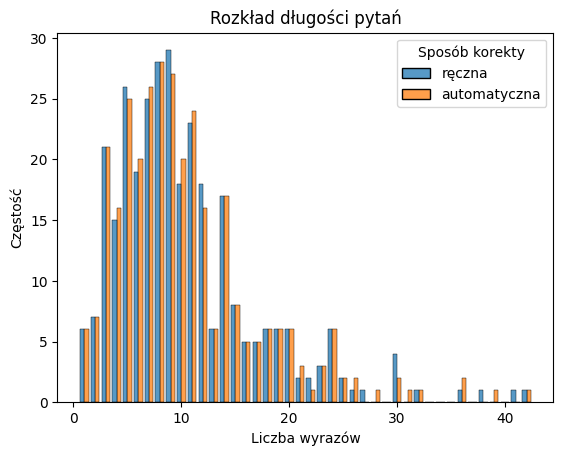

In [2]:
import seaborn as sns
import pandas as pd

# Set questions files paths:
man_questions_file_path = "data\\corrected_manually\\processed\\questions.txt"
aut_questions_file_path = "data\\processed\\corrected_questions.txt"


def count_query_length(file_path, type_of_correction):
    punctuations = [
        ".",
        ",",
        ":",
        ";",
        "/",
        "?",
        "!",
        "%",
        "(",
        ")",
        " ",
        "-",
        "\\",
        "..",
        "...",
        "....",
    ]
    removed_punctuations = []
    lengths = []
    # Read file content and split by line
    with open(file_path, encoding="utf8") as file:
        lines = file.read().split("\n")

    # Determine line length (in words):
    ## Caution! Beware of double spaces in source file!
    for line in lines:
        list_of_words = line.split()
        # Remove punctuations so they won't be counted
        for count, word in enumerate(list_of_words):
            if (word in punctuations) or (word == ""):
                removed_punctuations.append(word)
                list_of_words.pop(count)
        # Skip empty lines
        if list_of_words:
            lengths.append([type_of_correction, len(list_of_words)])

    return lengths


# Get lists of query lengths
man_lengths = count_query_length(man_questions_file_path, "ręczna")
aut_lengths = count_query_length(aut_questions_file_path, "automatyczna")

# Join lists
data = man_lengths + aut_lengths

# Create data frame
df = pd.DataFrame(data, columns=["Sposób korekty", "query_length"])


# Plot distribution plot using seaborn module
sns.histplot(
    df,
    x="query_length",
    hue="Sposób korekty",
    multiple="dodge",
    shrink=0.8,
    discrete=True,
).set(title="Rozkład długości pytań", ylabel="Częstość", xlabel="Liczba wyrazów")


## Answers length distribution histogram

- - - -
data\corrected_manually\processed\answers.txt
\ \ :
data\processed\corrected_answers.txt
[12, 15, 26, 12, 19, 5, 22, 8, 12, 14, 7, 5, 1, 4, 12, 9, 11, 5, 18, 2, 12, 2, 1, 13, 2, 1, 3, 14, 1, 3, 1, 1, 28, 9, 3, 4, 5, 1, 7, 6, 11, 5, 4, 14, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 3, 1, 2, 2, 2, 1, 2, 1, 6, 4, 1, 2, 3, 12, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 4, 1, 3, 4, 1, 1, 5, 9, 6, 9, 9, 6, 1, 2, 1, 5, 5, 3, 7, 19, 15, 3, 13, 11, 15, 10, 1, 1, 9, 9, 3, 6, 9, 1, 7, 20, 5, 10, 9, 1, 15, 6, 2, 6, 25, 43, 13, 3, 18, 19, 35, 2, 8, 7, 14, 3, 15, 11, 13, 7, 13, 4, 20, 14, 32, 8, 5, 25, 26, 21, 10, 18, 31, 9, 28, 10, 7, 28, 4, 10, 15, 14, 4, 2, 14, 2, 3, 1, 2, 1, 1, 2, 2, 3, 4, 3, 1, 1, 4, 3, 4, 5, 12, 23, 16, 5, 2, 6, 5, 2, 10, 8, 11, 8, 2, 3, 10, 1, 12, 8, 8, 1, 5, 1, 2, 10, 1, 6, 1, 5, 11, 3, 13, 6, 7, 11, 5, 9, 12, 6, 3, 6, 9, 6, 11, 5, 6, 3, 20, 1, 1, 10, 11, 1, 2, 10, 9, 8, 12, 10, 5, 1, 10, 6, 1, 1, 13, 2, 8, 1, 7, 4, 4, 18, 2, 2, 3, 5, 3, 3, 12, 8, 3, 1, 1, 1, 5, 1, 2, 3, 14, 2, 8, 7, 8,

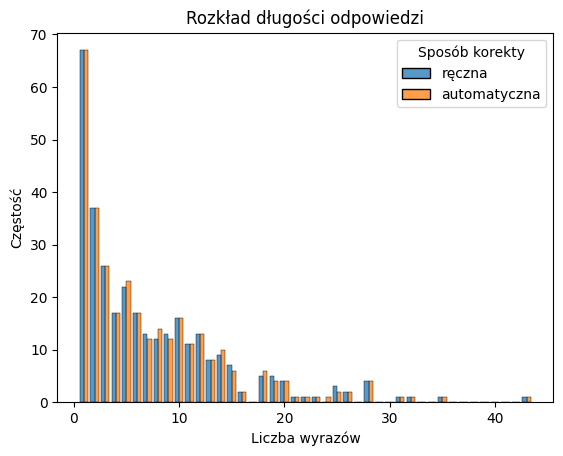

In [3]:
import seaborn as sns
import pandas as pd

# Set answers files paths:
man_answers_file_path = "data\\corrected_manually\\processed\\answers.txt"
aut_answers_file_path = "data\\processed\\corrected_answers.txt"


def count_query_length(file_path, type_of_correction):
    punctuations = [
        ".",
        ",",
        ":",
        ";",
        "/",
        "?",
        "!",
        "%",
        "(",
        ")",
        " ",
        "-",
        "\\",
        "..",
        "...",
        "....",
    ]
    removed_punctuations = []
    lengths = []
    # Read file content and split by line
    with open(file_path, encoding="utf8") as file:
        lines = file.read().split("\n")

    # Determine line length (in words):
    ## Caution! Beware of double spaces in source file!
    for line in lines:
        list_of_words = line.split()
        # Remove punctuations so they won't be counted
        for count, word in enumerate(list_of_words):
            if (word in punctuations) or (word == ""):
                removed_punctuations.append(word)
                list_of_words.pop(count)
        # Skip empty lines
        if list_of_words:
            lengths.append([type_of_correction, len(list_of_words)])

    return lengths


# Get lists of query lenghts
man_lengths = count_query_length(man_answers_file_path, "ręczna")
aut_lengths = count_query_length(aut_answers_file_path, "automatyczna")

# Join lists
data = man_lengths + aut_lengths

# Create data frame
df = pd.DataFrame(data, columns=["Sposób korekty", "query_length"])

# Plot distribution plot using seaborn module
sns.histplot(
    df,
    x="query_length",
    hue="Sposób korekty",
    multiple="dodge",
    shrink=0.8,
    discrete=True,
).set(title="Rozkład długości odpowiedzi", ylabel="Częstość", xlabel="Liczba wyrazów")


# Analyzing linguistic data using spaCy and pandas modules

## Create data frames for further analyses

In [32]:
import spacy
import pandas as pd

nlp = spacy.load("pl_core_news_lg")

corrected_questions_file_path = "data\\corrected_manually\\processed\\questions.txt"
corrected_answers_file_path = "data\\corrected_manually\\processed\\answers.txt"
corrected_full_dialogue_file_path = (
    "data\\corrected_manually\\processed\\full_dialogue.txt"
)


def analysis_table(file_path, group_by_list=False):
    # Lists to store data
    text_ = []
    lemma_ = []
    pos_ = []
    tag_ = []
    dep_ = []
    shape_ = []
    alpha_ = []
    stop_ = []

    with open(file_path, encoding="utf8") as file:
        text = file.read()
        lines = text.split("\n")
        for line in lines:
            if (line[:1] != "#") and line[:2] != ">>":
                line = nlp(line)
                for token in line:
                    text_.append(token.text)
                    lemma_.append(token.lemma_)
                    pos_.append(token.pos_)
                    tag_.append(token.tag_)
                    dep_.append(token.dep_)
                    shape_.append(token.shape_)
                    alpha_.append(token.is_alpha)
                    stop_.append(token.is_stop)

    # Create dictionary from collected data
    data = {
        "TEXT": text_,
        "LEMMA": lemma_,
        "POS": pos_,
        "TAG": tag_,
        "DEP": dep_,
        "SHAPE": shape_,
        "ALPHA": alpha_,
        "STOP": stop_,
    }

    # Create empty dataframe
    df = pd.DataFrame(data)

    if group_by_list:
        grouped_df = (
            df.groupby(group_by_list)
            .size()
            .sort_values(ascending=False)
            .reset_index(name="count")
        )
        return grouped_df
    else:
        return df


# # Full dialogue
full_dialogue_df = analysis_table(corrected_full_dialogue_file_path)
# With grouping
# full_dialogue_df = analysis_table(corrected_full_dialogue_file_path, group_by_list=['LEMMA', 'POS'])
# full_dialogue_df[full_dialogue_df["POS"] != 'PUNCT'].head(30)

# Questions
questions_df = analysis_table(corrected_questions_file_path)
# With grouping:
# questions_df = analysis_table(corrected_questions_file_path, group_by_list=['LEMMA', 'POS'])
# questions_df[questions_df["POS"] != 'PUNCT'].head(30)


# # Answers
answers_df = analysis_table(corrected_answers_file_path)
# With grouping
# answers_df = analysis_table(corrected_answers_file_path, group_by_list=['LEMMA', 'POS'])
# answers_df[answers_df["POS"] != 'PUNCT'].head(30)

# Display content of the data frame
full_dialogue_df


,TEXT,LEMMA,POS,TAG,DEP,SHAPE,ALPHA,STOP
0,Czyj,czyj,DET,ADJ,nsubj,Xxxx,True,False
1,to,to,AUX,PRED,cop,xx,True,True
2,pomnik,pomnik,NOUN,SUBST,ROOT,xxxx,True,False
3,?,?,PUNCT,INTERP,punct,?,False,False
4,Pomnik,pomnik,NOUN,SUBST,nsubj,Xxxxx,True,False
...,...,...,...,...,...,...,...,...
6475,w,w,ADP,PREP,case,x,True,True
6476,lewo,lewo,NOUN,ADJP,obl,xxxx,True,False
6477,do,do,ADP,PREP,case,xx,True,True
6478,skraju,skraj,NOUN,SUBST,fixed,xxxx,True,False


### Display all lexemes (except SYM, PUNCT and X)

In [33]:
full_dialogue_df[
    (full_dialogue_df["POS"] != "X")
    & (full_dialogue_df["POS"] != "SYM")
    & (full_dialogue_df["POS"] != "PUNCT")
]


,TEXT,LEMMA,POS,TAG,DEP,SHAPE,ALPHA,STOP
0,Czyj,czyj,DET,ADJ,nsubj,Xxxx,True,False
1,to,to,AUX,PRED,cop,xx,True,True
2,pomnik,pomnik,NOUN,SUBST,ROOT,xxxx,True,False
4,Pomnik,pomnik,NOUN,SUBST,nsubj,Xxxxx,True,False
5,przedstawia,przedstawiać,VERB,FIN,ROOT,xxxx,True,False
...,...,...,...,...,...,...,...,...
6475,w,w,ADP,PREP,case,x,True,True
6476,lewo,lewo,NOUN,ADJP,obl,xxxx,True,False
6477,do,do,ADP,PREP,case,xx,True,True
6478,skraju,skraj,NOUN,SUBST,fixed,xxxx,True,False


### Display 20 most frequent lexemes

In [42]:
# In questions
questions_df = questions_df[
    (questions_df["POS"] != "X")
    & (questions_df["POS"] != "SYM")
    & (questions_df["POS"] != "PUNCT")
]

questions_df.groupby(["LEMMA", "POS"]).size().sort_values(ascending=False).reset_index(
    name="Ilość"
).head(20)

# In asnwers
answers_df = answers_df[
    (answers_df["POS"] != "X")
    & (answers_df["POS"] != "SYM")
    & (answers_df["POS"] != "PUNCT")
]

answers_df.groupby(["LEMMA", "POS"]).size().sort_values(ascending=False).reset_index(
    name="Ilość"
).head(20)

# In whole experiment
full_dialogue_df = full_dialogue_df[
    (full_dialogue_df["POS"] != "X")
    & (full_dialogue_df["POS"] != "SYM")
    & (full_dialogue_df["POS"] != "PUNCT")
]

full_dialogue_df.groupby(["LEMMA", "POS"]).size().sort_values(
    ascending=False
).reset_index(name="Ilość").head(20)


,LEMMA,POS,Ilość
0,na,ADP,229
1,co,PRON,169
2,być,AUX,154
3,się,PRON,144
4,po,ADP,137
...,...,...,...
847,odróżniać,VERB,1
848,odgradzać,ADJ,1
849,obydwa,ADJ,1
850,obręb,NOUN,1


## Determine lexeme saturation during the experiment

### Prepare data frame for further analyses

In [3]:
import spacy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

nlp = spacy.load("pl_core_news_lg")

corrected_questions_file_path = "data\\corrected_manually\\processed\\questions.txt"
corrected_answers_file_path = "data\\corrected_manually\\processed\\answers.txt"
corrected_full_dialogue_file_path = (
    "data\\corrected_manually\\processed\\full_dialogue.txt"
)


def analysis_table(file_path):

    # Create data frame to store the data
    df = pd.DataFrame(
        columns=[
            "SESSION",
            "TEXT",
            "LEMMA",
            "POS",
            "TAG",
            "DEP",
            "SHAPE",
            "ALPHA",
            "STOP",
        ]
    )

    # Read data
    with open(file_path, encoding="utf8") as file:
        text = file.read()
        session_no = 1
        list_of_sessions = text.split("##\n##\n##\n##\n")
        for session in list_of_sessions:
            # Lists to store data
            text_ = []
            lemma_ = []
            pos_ = []
            tag_ = []
            dep_ = []
            shape_ = []
            alpha_ = []
            stop_ = []

            lines = session.split("\n")
            for line in lines:
                if (line[:1] != "#") and line[:2] != ">>":
                    line = nlp(line)
                    for token in line:
                        text_.append(token.text)
                        lemma_.append(token.lemma_)
                        pos_.append(token.pos_)
                        tag_.append(token.tag_)
                        dep_.append(token.dep_)
                        shape_.append(token.shape_)
                        alpha_.append(token.is_alpha)
                        stop_.append(token.is_stop)

            # Add data to data frame
            new_data = {
                "SESSION": session_no,
                "TEXT": text_,
                "LEMMA": lemma_,
                "POS": pos_,
                "TAG": tag_,
                "DEP": dep_,
                "SHAPE": shape_,
                "ALPHA": alpha_,
                "STOP": stop_,
            }
            temp_df = pd.DataFrame(new_data)
            df = pd.concat([df, temp_df])

            # Increase session counter
            session_no += 1

    return df


# Full dialogue
full_dialogue_df = analysis_table(corrected_full_dialogue_file_path)
# full_dialogue_df[full_dialogue_df["POS"] != 'PUNCT'].head(30)
full_dialogue_df.head(20)
# full_dialogue_df


,SESSION,TEXT,LEMMA,POS,TAG,DEP,SHAPE,ALPHA,STOP
0,1,Czyj,czyj,DET,ADJ,nsubj,Xxxx,True,False
1,1,to,to,AUX,PRED,cop,xx,True,True
2,1,pomnik,pomnik,NOUN,SUBST,ROOT,xxxx,True,False
3,1,?,?,PUNCT,INTERP,punct,?,False,False
4,1,Pomnik,pomnik,NOUN,SUBST,nsubj,Xxxxx,True,False
5,1,przedstawia,przedstawiać,VERB,FIN,ROOT,xxxx,True,False
6,1,Jana,Jan,PROPN,SUBST,obj,Xxxx,True,False
7,1,Pawła,Paweł,PROPN,SUBST,flat,Xxxxx,True,False
8,1,II,II,ADJ,ADJ,amod:flat,XX,True,False
9,1,",",",",PUNCT,INTERP,punct,",",False,False


### Group lexemes by session and plot lexeme saturation on connected scatterplot

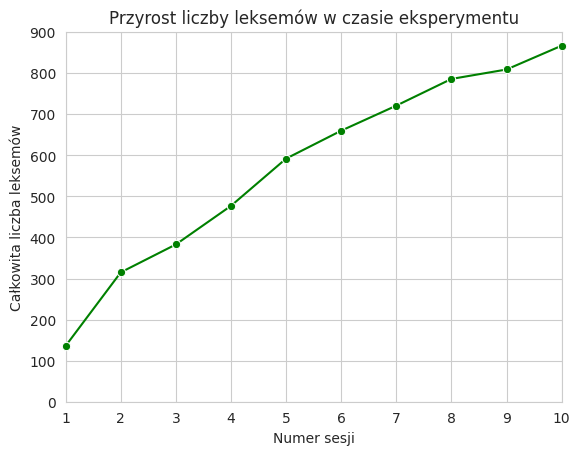

In [45]:
# Remove duplicates and keep only first occurrence
df = (
    full_dialogue_df.drop_duplicates(subset=["LEMMA", "POS"], keep="first")
    .reset_index(drop=True)
    .copy()
)  # Got 880 rows

# Remove punctuations (POS = PUNCT)
df.drop(df[df["POS"] == "PUNCT"].index, inplace=True)  # Got 868 rows

# Group by SESSION to get amount of new lemma by experiment
df = df.groupby("SESSION").size().reset_index(name="COUNT")

# Add sum column to determine lemma increase
df = df.assign(SUM=df.COUNT.cumsum())
df

# Plot results
with sns.axes_style("whitegrid"):
    sns.lineplot(
        data=df,
        x="SESSION",
        y="SUM",
        marker="o",
        color="green",
        clip_on=False,
        zorder=10,
    ).set(
        title="Przyrost liczby leksemów w czasie eksperymentu",
        ylabel="Całkowita liczba leksemów",
        xlabel="Numer sesji",
    )

plt.xticks(np.arange(1, 11, 1))
plt.yticks(np.arange(0, 1000, 100))
plt.xlim(right=10, left=1)
plt.ylim(top=900)

plt.show()


### Visualize number of new lexemes per session on barplot

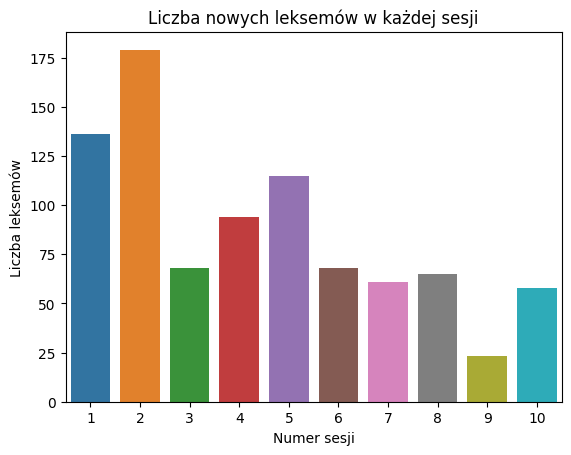

In [46]:
# Plot results
sns.barplot(data=df, x="SESSION", y="COUNT",).set(
    title="Liczba nowych leksemów w każdej sesji",
    ylabel="Liczba leksemów",
    xlabel="Numer sesji",
)

plt.show()


## Visualize number of lexemes per session and increasing lexeme saturation on barplot
Suma leksemów plus przyrost na sesję

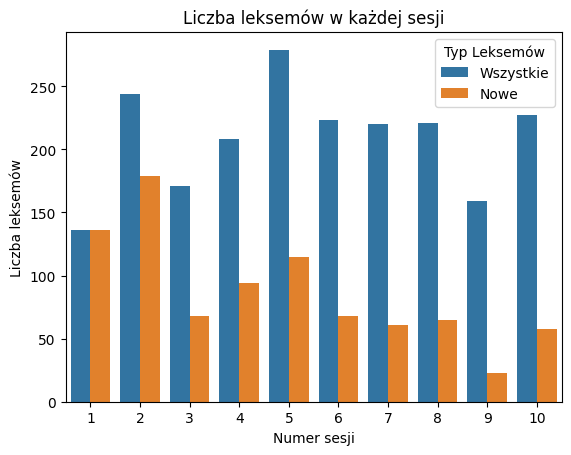

,SESSION,COUNT,Typ Leksemów
0,1,136,Wszystkie
1,2,244,Wszystkie
2,3,171,Wszystkie
3,4,208,Wszystkie
4,5,279,Wszystkie
5,6,223,Wszystkie
6,7,220,Wszystkie
7,8,221,Wszystkie
8,9,159,Wszystkie
9,10,227,Wszystkie


In [47]:
# Create copy of the df without punctuations
all_lex_df = full_dialogue_df.copy()

# Remove Punctuations
all_lex_df = all_lex_df[all_lex_df.POS != "PUNCT"]

# Remove duplicated within session
all_lex_df = all_lex_df.drop_duplicates(
    subset=["SESSION", "LEMMA", "POS"], keep="first"
).reset_index(drop=True)

# Group by SESSION to get amount of new lemma by experiment
all_lex_df = all_lex_df.groupby("SESSION").size().reset_index(name="COUNT")
# Add column with lexem type - is it new lexeme (first occurence) or was recoreded before
all_lex_df["Typ Leksemów"] = "Wszystkie"


# Make copy of unique lexems data frame
new_lex_df = pd.DataFrame(df, columns=["SESSION", "COUNT"]).copy()

# Add column with lexem type - is it new lexeme (first occurrence) or was recorded before
new_lex_df["Typ Leksemów"] = "Nowe"

# Join data frames
joined_df = pd.concat([all_lex_df, new_lex_df], axis=0)

# Display data frame
joined_df

# Plot data
sns.barplot(data=joined_df, x="SESSION", y="COUNT", hue="Typ Leksemów").set(
    title="Liczba leksemów w każdej sesji",
    ylabel="Liczba leksemów",
    xlabel="Numer sesji",
)
# plt.legend(labels=['Wszystkie', 'Nowe'])
plt.show()

joined_df
